In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

- Tratamiento de los dos data que hablan sobre movimientos de los usuarios

In [81]:
df1 = pd.read_csv('C:/Users/CeX-Laguna/Downloads/df_final_web_data_pt_1.txt')

In [82]:
df2 = pd.read_csv('C:/Users/CeX-Laguna/Downloads/df_final_web_data_pt_2.txt')

In [83]:
df1.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [84]:
df2.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

- Tratamiento del demo final 

In [85]:
df_web_data = pd.concat([df1, df2], axis=0)

In [86]:
demo = pd.read_csv("CSV/df_final_demo.txt", low_memory=False)

In [87]:
demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [88]:
demo = demo.fillna('Unknown')

In [89]:
demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [90]:
frequency_gendr = demo['gendr'].value_counts()
frequency_gendr

gendr
U          24122
M          23724
F          22746
Unknown       14
X              3
Name: count, dtype: int64

In [91]:
frequency_table2 = demo['gendr'].value_counts(normalize=True).head(3)

In [92]:
demo['clnt_age'] = pd.to_numeric(demo['clnt_age'], errors='coerce')


In [93]:
demo_filtrado.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [94]:
demo_filtrado = demo[demo['clnt_age'].between(20, 80)]

<Axes: xlabel='clnt_age', ylabel='Count'>

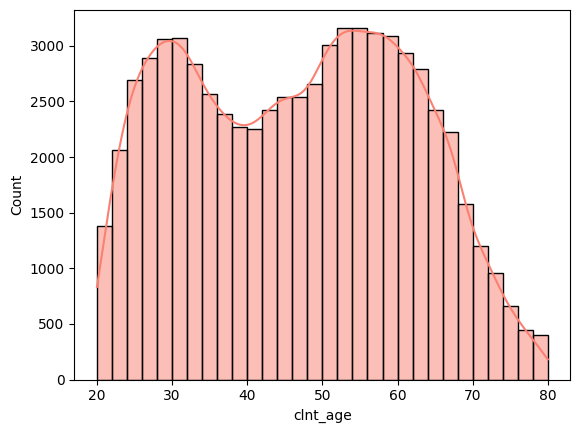

In [95]:
sns.histplot(demo_filtrado['clnt_age'], kde=True, bins=30, color="salmon")

In [96]:
demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20052\3113405766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = pd.to_numeric(demo_filtrado['bal'], errors='coerce')


In [97]:
demo_filtrado['bal'] = demo_filtrado['bal'].round(2)

C:\Users\CeX-Laguna\AppData\Local\Temp\ipykernel_20052\672603886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_filtrado['bal'] = demo_filtrado['bal'].round(2)


In [98]:
demo_filtrado

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


### EMPEZAR A BUSCAR RELACION ENTRE LAS COLUMNAS. RELACION + GRAFICO

In [99]:
frequency_bal = demo_filtrado['bal'].value_counts()

proportion_bal = demo_filtrado['bal'].value_counts(normalize=True)

frequency_bal, proportion_bal

(bal
 31188.62     5
 29388.51     4
 31398.74     3
 29389.11     3
 24953.79     3
             ..
 135143.26    1
 25561.22     1
 41751.20     1
 32797.00     1
 522498.72    1
 Name: count, Length: 68510, dtype: int64,
 bal
 31188.62     0.000073
 29388.51     0.000058
 31398.74     0.000044
 29389.11     0.000044
 24953.79     0.000044
                ...   
 135143.26    0.000015
 25561.22     0.000015
 41751.20     0.000015
 32797.00     0.000015
 522498.72    0.000015
 Name: proportion, Length: 68510, dtype: float64)

In [100]:
frequency_cuentas = demo_filtrado['num_accts'].value_counts()
frequency_cuentas

num_accts
2.0    54049
3.0    12192
4.0     2201
5.0      281
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: xlabel='num_accts', ylabel='Count'>

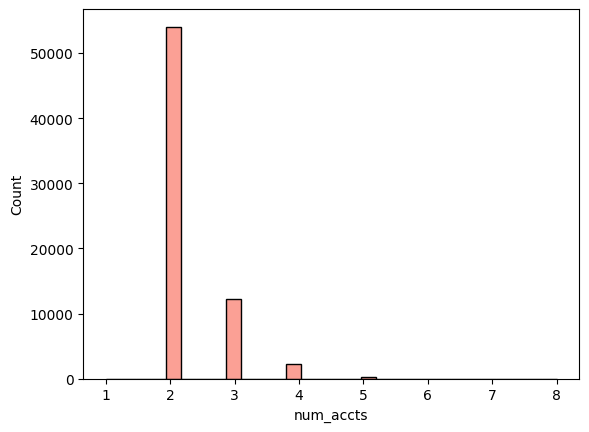

In [101]:
sns.histplot(demo_filtrado['num_accts'], bins=30, color="salmon")

In [102]:
frequency_llamadas = demo_filtrado['calls_6_mnth'].value_counts()
frequency_llamadas

calls_6_mnth
6.0    13818
1.0    10741
2.0     9944
3.0     8492
0.0     7585
4.0     6935
5.0     6484
7.0     4768
Name: count, dtype: int64

<Axes: xlabel='calls_6_mnth', ylabel='Count'>

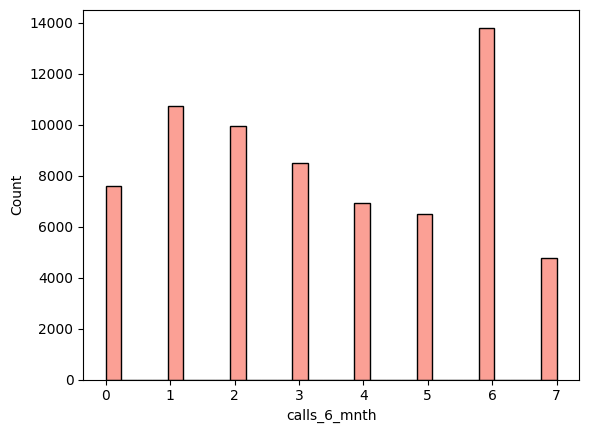

In [103]:
sns.histplot(demo_filtrado['calls_6_mnth'], color="salmon")

In [104]:
frequency_entradas = demo_filtrado['logons_6_mnth'].value_counts()
frequency_entradas

logons_6_mnth
9.0    12133
3.0     9973
4.0     9939
7.0     9624
5.0     9008
6.0     7667
8.0     4737
2.0     2861
1.0     2825
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

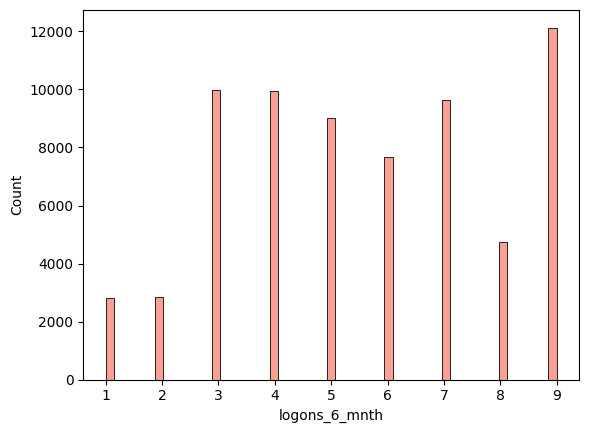

In [105]:
sns.histplot(demo_filtrado['logons_6_mnth'], color="salmon")

In [106]:
frequency_años = demo_filtrado['clnt_tenure_yr'].value_counts()
frequency_años

clnt_tenure_yr
6.0     6876
5.0     6636
7.0     4864
15.0    4501
4.0     4409
8.0     3983
14.0    3610
12.0    3601
13.0    3572
9.0     3308
11.0    2894
10.0    2754
16.0    2664
21.0    2179
20.0    1531
22.0    1442
17.0    1349
23.0    1222
18.0    1184
19.0    1133
24.0     810
26.0     630
27.0     599
28.0     483
25.0     461
3.0      418
30.0     293
29.0     293
33.0     195
32.0     181
34.0     168
31.0     161
35.0     101
2.0       76
36.0      36
37.0      33
38.0      31
48.0      16
55.0       9
40.0       9
50.0       7
39.0       7
42.0       6
43.0       6
47.0       6
46.0       4
51.0       4
49.0       4
44.0       2
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

CON ESTO PODEMOS SABER CUANTOS AÑOS LLEVAN UNA GRAN PARTE DE NUESTROS CLIENTES, EN EL QUE SE PUEDE VER QUE SOBRESALEN 5 Y 6 AÑOS

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

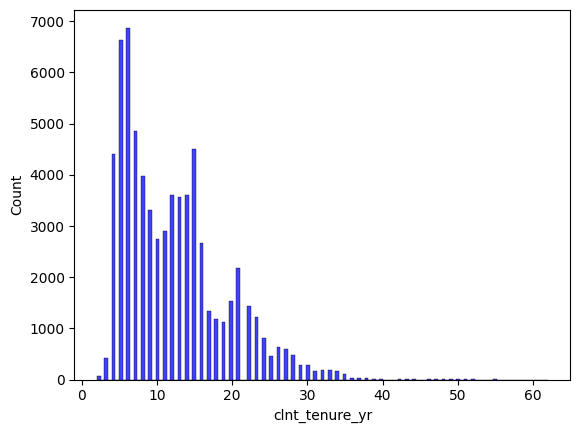

In [107]:
sns.histplot(demo_filtrado['clnt_tenure_yr'], color="blue")

#### -Lo que nos muestra este gráfico que hay más dinero en los clientes que tienen de 5 a 7 cuentas.

In [ ]:
crosstab_result = pd.crosstab(demo_filtrado['log'], df['SaleCondition'])

crosstab_result

In [ ]:
correlation = demo_filtrado['clnt_age'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation

In [ ]:
correlation2 = demo_filtrado['calls_6_mnth'].corr(demo_filtrado['logons_6_mnth'], method='spearman')
correlation2

In [ ]:
sns.lmplot(data=demo_filtrado,
            x='calls_6_mnth',
            y='logons_6_mnth')

In [ ]:
correlation5 = demo_filtrado['clnt_tenure_yr'].corr(demo_filtrado['bal'], method='spearman')
correlation5

In [ ]:
correlation6 = demo_filtrado['clnt_age'].corr(demo_filtrado['num_accts'], method='spearman')
correlation6

In [ ]:
sns.barplot(data=demo_filtrado, x='gendr', y='num_accts', palette="coolwarm")

In [ ]:
correlation7 = demo_filtrado['clnt_age'].corr(demo_filtrado['clnt_tenure_yr'], method='spearman')
correlation7

### SUBIDA DE LOS OTROS ARCHIVOS Y UNIÓN

In [ ]:
df1 = pd.read_csv('CSV/df_final_experiment_clients.txt')
df1

#### TRATAMIENTO DEL CSV PARA SABER VALORES NULOS Y COMO TRATARLOS

In [ ]:
df1.isnull().sum()

In [ ]:
frequency_df1 = df1['Variation'].value_counts()
frequency_df1

In [ ]:
df1_filtrado = df1[df1['Variation'].isin(['Control', 'Test'])]
df1_filtrado

#### MERGE ENTRE DEMO (NUESTRO ORIGINAL - Y EL CSV TEST/CONTROL)

In [ ]:
demo_unido = pd.merge(df1_filtrado, demo, on='client_id', how='inner')
demo_unido